# Лабораторная работа №2

## Ширяева Ольга, 4 курс, 3 группа

Построение скелета бинарного изображения

Разработать программу построения скелета на основе преобразований утоньшения для бинарных изображений.

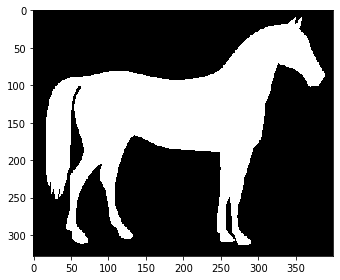

In [16]:
import numpy as np
from skimage import data
from skimage import io
from skimage.morphology import binary_erosion

from matplotlib import pyplot as plt

%matplotlib inline

data = data.horse()
data = np.invert(data)
io.imshow(data)
io.show()

In [17]:
def cross(x, a, b):
    x1 = binary_erosion(x, a)
    x2 = binary_erosion(np.logical_not(x), b)
    return np.logical_and(x1, x2)


def thinner(x, a, b):
    return np.logical_and(x, np.logical_not(cross(x, a, b)))


def plot_results(y):
    plt.imshow(y, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Skeleton')
    plt.show()

In [21]:
def iterate_t1_t4(image):
    a = np.array([[True, True, True],
                  [False, True, False],
                  [False, False, False]])
    
    b = np.array([[False, False, False],
                  [False, False, False],
                  [True, True, True]])
    
    for i in range(0, 4):
        image = thinner(image, a, b)
        a = np.rot90(a)
        b = np.rot90(b)
        
    return image
        
        
def iterate_t5_t8(image):
    a = np.array([ [False, True, False],
                   [False, True, True],
                   [False, False, False]])
    
    b = np.array([ [False, False, False],
                   [True, False, False],
                   [True, True, False]])
    
    for i in range(0, 4):
        image = thinner(image, a, b)
        a = np.rot90(a)
        b = np.rot90(b)
                
    return image


def build_skeleton(x):
    image = x.copy()
    n = 0

    while True:
        current = image.copy()
        image = iterate_t1_t4(image)
        image = iterate_t5_t8(image)      
        n += 1
    
        if (current == image).all():
            break
    
    return image, n

Iterations:  58


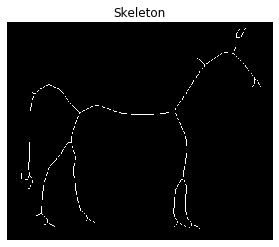

In [22]:
skeleton, iterations_num = build_skeleton(data)
        
print("Iterations: ", iterations_num)

plot_results(skeleton)